**Part 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("StudentsPerformance (1).csv")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# 1. Find the average score group wise for males and females separately.

In [ ]:
df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


# 2. Find the % of males scoring above 80 in math and 85 in reading group wise under [parental level of education as bachelor degree

In [ ]:
a1 = df.groupby(['gender','parental level of education']).get_group(('male',"bachelor's degree"))
a2 = a1[(a1['math score']>80) & (a1['reading score']>85)]
a3 = df.groupby('gender').get_group('male')
(len(a2)/len(a3))*100

1.0373443983402488

# 3. Find the count of males under group E that are either having parental level of education as high school or under bachelor degree program

In [ ]:
a=df.groupby(['race/ethnicity','gender'])

b=a.get_group(('group E','male'))

c=b.groupby('parental level of education')

len(c.get_group('high school'))+len(c.get_group("bachelor's degree"))

18

# 4. Find the maximum marks for math, reading and writing for each group and plot them

In [ ]:
new = df.groupby('race/ethnicity')[['math score','reading score','writing score']].max()
new

,math score,reading score,writing score
race/ethnicity,,,
group A,100,100,97
group B,97,97,96
group C,98,100,100
group D,100,100,100
group E,100,100,100


<Figure size 2500x2500 with 0 Axes>

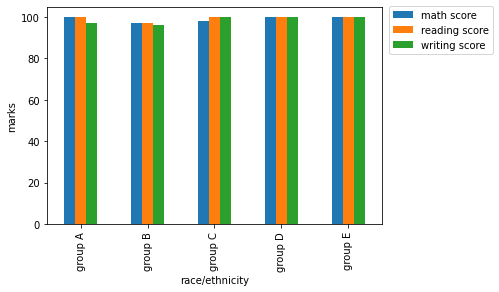

In [ ]:
plt.figure(figsize=(5,5),dpi=500)
new.plot(kind='bar')
plt.ylabel('marks')
plt.legend(loc=(1.02,0.78))

# 5. Plot the count of students based on their gender and whether they have prepared for the test or not

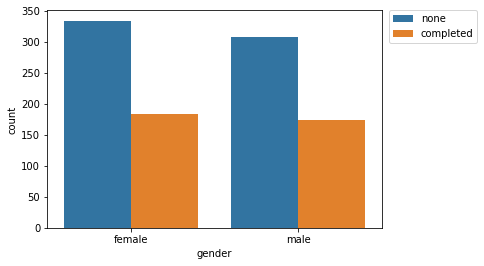

In [ ]:
sns.countplot(data=df,x='gender',hue='test preparation course')
plt.legend(loc=(1.02,0.85))

# 6. Plot the scores in all three subjects based on their gender

In [ ]:
temp=df.groupby('gender').mean()

temp

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<Figure size 3000x2000 with 0 Axes>

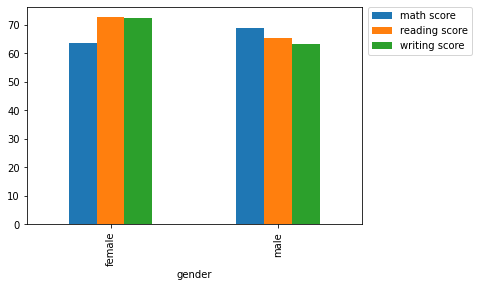

In [ ]:
plt.figure(dpi=500)
temp.plot(kind='bar')
plt.legend(loc=(1.02,0.78))

# 7. Plot the relations between various columns based on the correlation coefficient

In [ ]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


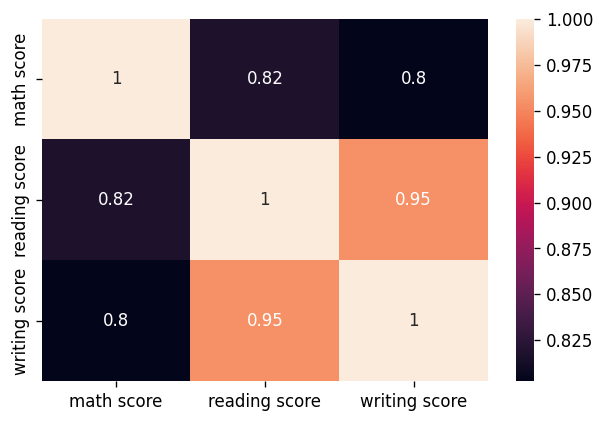

In [ ]:
plt.figure(dpi=120)
sns.heatmap(data=df.corr(),annot=True)

# 8. Plot the scores of each student group wise and parental level of education

In [ ]:
new = df.groupby(['race/ethnicity','parental level of education']).mean()
new=new.reset_index()
new.head()

,race/ethnicity,parental level of education,math score,reading score,writing score
0,group A,associate's degree,61.000000,67.071429,63.571429
1,group A,bachelor's degree,67.166667,68.083333,68.333333
2,group A,high school,60.444444,62.888889,60.500000
3,group A,master's degree,57.666667,64.666667,67.666667
4,group A,some college,63.888889,65.777778,65.000000


Text(0.5, 1.0, 'Race/Ethnicity vs Mean Math Score based on Parental level of education')

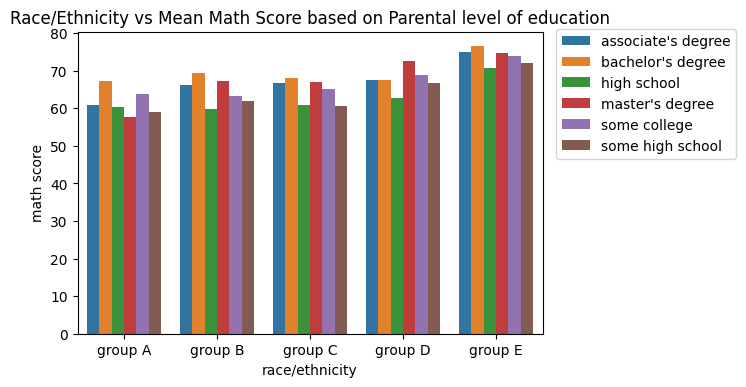

In [ ]:
plt.figure(dpi=100)
sns.barplot(data=new,x='race/ethnicity',y='math score',hue='parental level of education')
plt.legend(loc=(1.03,0.58))
plt.title('Race/Ethnicity vs Mean Math Score based on Parental level of education')

Text(0.5, 1.0, 'Race/Ethnicity vs Mean Writing Score based on Parental level of education')

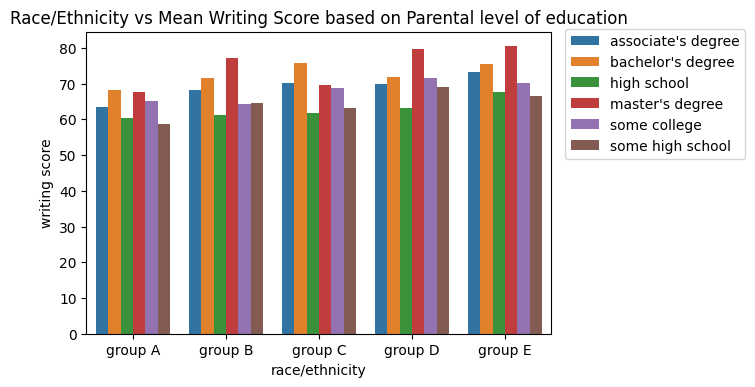

In [ ]:
plt.figure(dpi=100)
sns.barplot(data=new,x='race/ethnicity',y='writing score',hue='parental level of education')
plt.legend(loc=(1.03,0.58))
plt.title('Race/Ethnicity vs Mean Writing Score based on Parental level of education')

Text(0.5, 1.0, 'Race/Ethnicity vs Mean Reading Score based on Parental level of education')

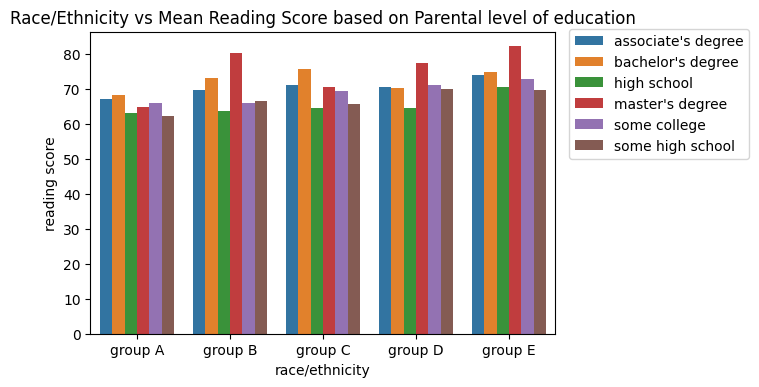

In [ ]:
plt.figure(dpi=100)
sns.barplot(data=new,x='race/ethnicity',y='reading score',hue='parental level of education')
plt.legend(loc=(1.03,0.58))
plt.title('Race/Ethnicity vs Mean Reading Score based on Parental level of education')

# 9. Plot the relation between marks and preparation that will help understand them properly

In [ ]:
new=df.groupby('test preparation course').mean()
new

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


<Figure size 600x400 with 0 Axes>

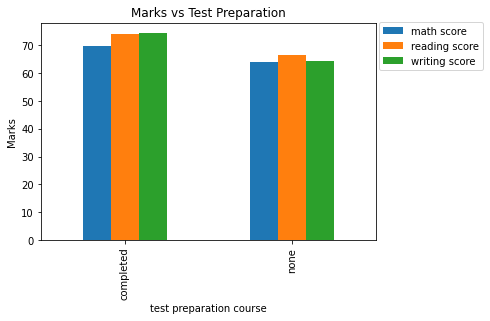

In [ ]:
plt.figure(dpi=100)
new.plot(kind='bar')
plt.ylabel('Marks')
plt.title('Marks vs Test Preparation')
plt.legend(loc=(1.01,0.78))
plt.show()

# 10. Using any kind of plot, find whether the data is left skewed or right skewed based on scores of each subject.

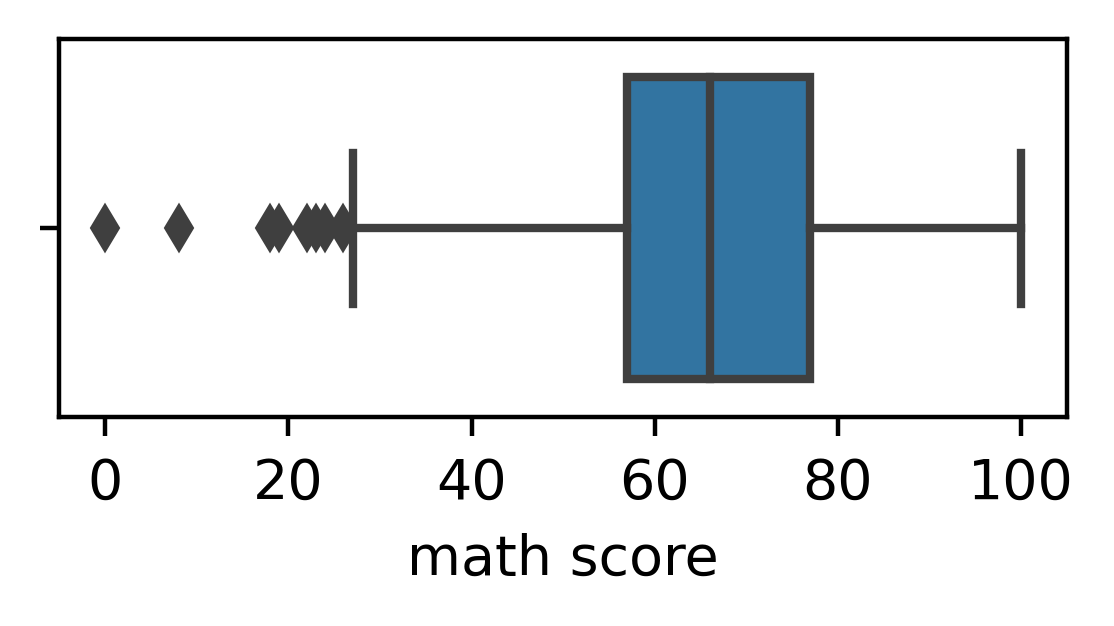

In [ ]:
plt.figure(figsize=(3.25,1.25),dpi=400)
sns.boxplot(data=df,x='math score')

**Based on the math score, the data is right-skewed.**

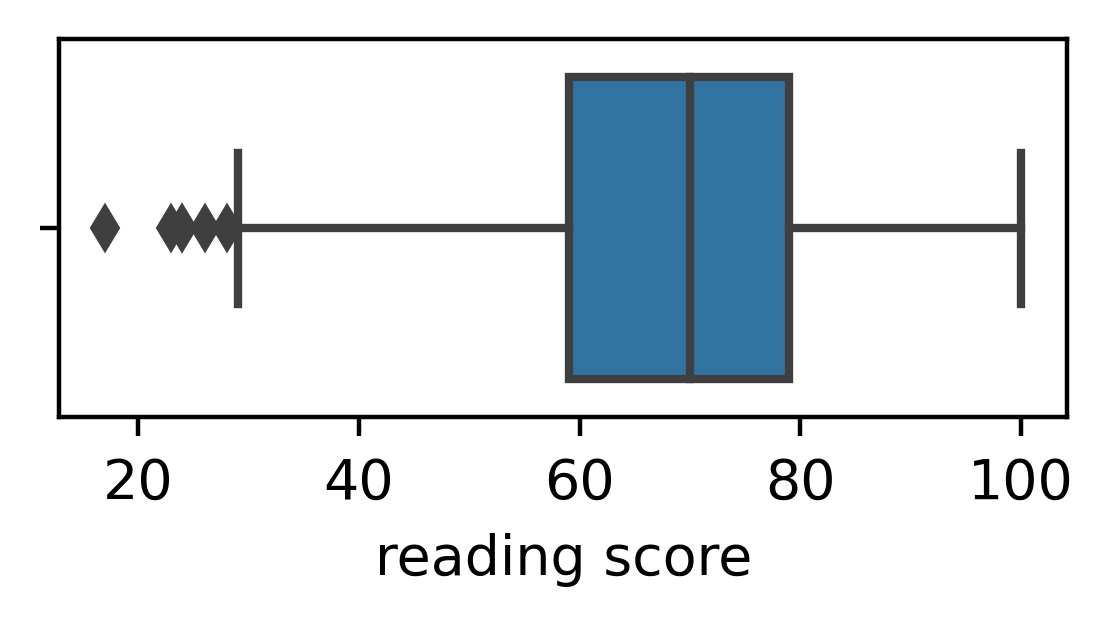

In [ ]:
plt.figure(figsize=(3.25,1.25),dpi=400)
sns.boxplot(data=df,x='reading score')

**Based on the math score, the data is left-skewed.**

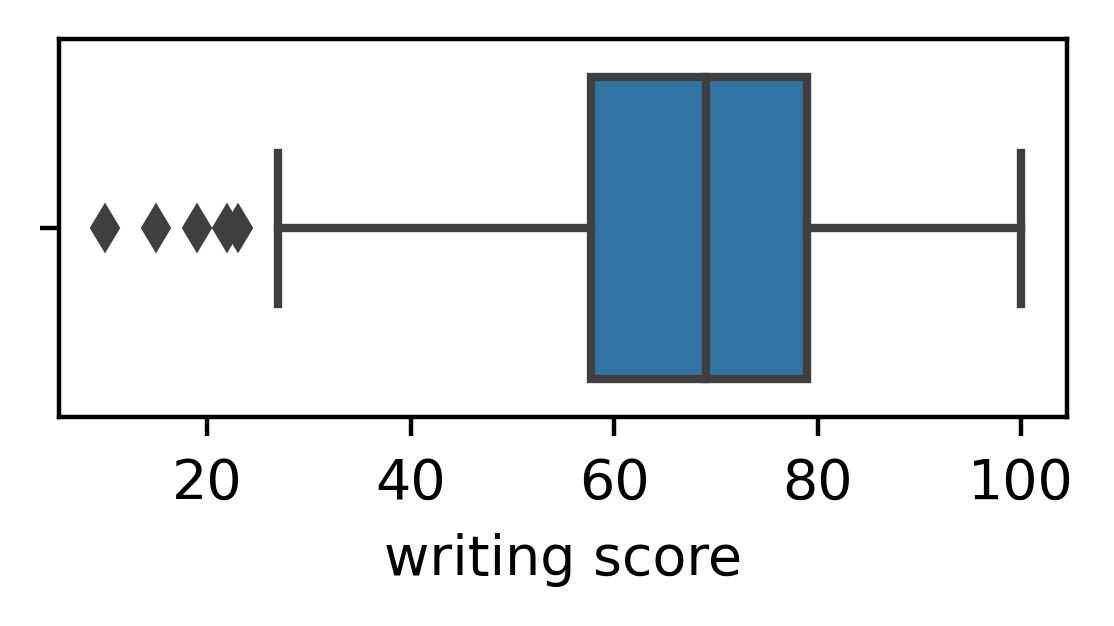

In [ ]:
plt.figure(figsize=(3.25,1.25),dpi=400)
sns.boxplot(data=df,x='writing score')

**Based on the math score, the data is left-skewed.**



# Perform one hot encoding to prepare the dataset for ML models

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(dtype=np.int32)

In [ ]:
asd = ohe.fit_transform(df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']]).toarray()

In [ ]:
asd

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

In [ ]:
ohe.categories_

[array(['female', 'male'], dtype=object),
 array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object),
 array(["associate's degree", "bachelor's degree", 'high school',
        "master's degree", 'some college', 'some high school'],
       dtype=object),
 array(['free/reduced', 'standard'], dtype=object),
 array(['completed', 'none'], dtype=object)]

In [ ]:
col_labels = np.array(['female', 'male','group A', 'group B', 'group C', 'group D', 'group E',"associate's degree", "bachelor's degree", 'high school',"master's degree", 'some college', 'some high school','free/reduced', 'standard','completed', 'none','math score', 'reading score','writing score'],dtype=object)

In [ ]:
df[['math score', 'reading score','writing score']].values

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [ ]:
final_df = pd.DataFrame(np.hstack((asd,df[['math score', 'reading score','writing score']].values)),columns=col_labels)

In [ ]:
final_df.head()

,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none,math score,reading score,writing score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,72,72,74
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,69,90,88
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,90,95,93
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,47,57,44
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,76,78,75


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**DATA PREP**

In [ ]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [ ]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [ ]:
final_df = pd.concat([df_objs,df_nums],axis=1)

In [ ]:
final_df.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math score,reading score,writing score
0,0,1,0,0,0,1,0,0,0,0,1,1,72,72,74
1,0,0,1,0,0,0,0,0,1,0,1,0,69,90,88
2,0,1,0,0,0,0,0,1,0,0,1,1,90,95,93
3,1,0,0,0,0,0,0,0,0,0,0,1,47,57,44
4,1,0,1,0,0,0,0,0,1,0,1,1,76,78,75


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
final_df.to_csv('task_df.csv')

**Part 2**

# Predicting each Subject Scores 

# Data Prep

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('task_df.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'gender_male', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math score,reading score,writing score
0,0,1,0,0,0,1,0,0,0,0,1,1,72,72,74
1,0,0,1,0,0,0,0,0,1,0,1,0,69,90,88
2,0,1,0,0,0,0,0,1,0,0,1,1,90,95,93
3,1,0,0,0,0,0,0,0,0,0,0,1,47,57,44
4,1,0,1,0,0,0,0,0,1,0,1,1,76,78,75


In [ ]:
df.columns

Index(['gender_male', 'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
X=df.drop(['math score','reading score','writing score'],axis=1)

In [ ]:
y=df[['math score','reading score','writing score']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lm = Lasso(max_iter=1000000)

In [ ]:
alphas = np.linspace(0,1000,10000)

In [ ]:
param_grid={'alpha':alphas}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gm = GridSearchCV(estimator=lm,param_grid=param_grid,scoring='neg_mean_squared_error')

In [ ]:
gm.fit(scaled_X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.622e+04, tolerance: 1.233e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

GridSearchCV(estimator=Lasso(max_iter=1000000),
             param_grid={'alpha': array([0.00000000e+00, 1.00010001e-01, 2.00020002e-01, ...,
       9.99799980e+02, 9.99899990e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [ ]:
gm.best_estimator_

Lasso(alpha=0.2000200020002, max_iter=1000000)

In [ ]:
gm_pred = gm.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(y_test,gm_pred)

10.91966378567768

In [ ]:
np.sqrt(mean_squared_error(y_test,gm_pred))

13.730112154099025

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rm = Ridge(max_iter=100000)

In [ ]:
alphas = np.linspace(0.001,1000,1000)

In [ ]:
param_grid={'alpha':alphas}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gm = GridSearchCV(estimator=rm,param_grid=param_grid,scoring='neg_mean_squared_error')

In [ ]:
gm.fit(scaled_X_train,y_train)

GridSearchCV(estimator=Ridge(max_iter=100000),
             param_grid={'alpha': array([1.00000e-03, 1.00200e+00, 2.00300e+00, 3.00400e+00, 4.00500e+00,
       5.00600e+00, 6.00700e+00, 7.00800e+00, 8.00900e+00, 9.01000e+00,
       1.00110e+01, 1.10120e+01, 1.20130e+01, 1.30140e+01, 1.40150e+01,
       1.50160e+01, 1.60170e+01, 1.70180e+01, 1.80190e+01, 1.90200e+01,
       2.00210e+01, 2.10220e+01, 2.20230e+01, 2...
       9.70971e+02, 9.71972e+02, 9.72973e+02, 9.73974e+02, 9.74975e+02,
       9.75976e+02, 9.76977e+02, 9.77978e+02, 9.78979e+02, 9.79980e+02,
       9.80981e+02, 9.81982e+02, 9.82983e+02, 9.83984e+02, 9.84985e+02,
       9.85986e+02, 9.86987e+02, 9.87988e+02, 9.88989e+02, 9.89990e+02,
       9.90991e+02, 9.91992e+02, 9.92993e+02, 9.93994e+02, 9.94995e+02,
       9.95996e+02, 9.96997e+02, 9.97998e+02, 9.98999e+02, 1.00000e+03])},
             scoring='neg_mean_squared_error')

In [ ]:
gm.best_estimator_

Ridge(alpha=36.037, max_iter=100000)

In [ ]:
gm_pred = gm.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mean_absolute_error(y_test,gm_pred)

10.87944928839581

In [ ]:
np.sqrt(mean_squared_error(y_test,gm_pred))

13.683164405869531

# ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
em = ElasticNet() 

In [ ]:
param_grid = {'alpha':[0.001,0.01,0.08,0.1,0.13,1,2,5,10,50,100],
              'l1_ratio':[0.1,0.5,0.68,0.7,0.74,0.95,0.99,1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_model = GridSearchCV(estimator=em,param_grid=param_grid,cv=5)

In [ ]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.08, 0.1, 0.13, 1, 2, 5, 10,
                                   50, 100],
                         'l1_ratio': [0.1, 0.5, 0.68, 0.7, 0.74, 0.95, 0.99,
                                      1]})

In [ ]:
grid_model.best_estimator_

ElasticNet(alpha=0.13, l1_ratio=0.74)

In [ ]:
grid_model.best_params_

{'alpha': 0.13, 'l1_ratio': 0.74}

In [ ]:
grid_pred = grid_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
np.sqrt(mean_squared_error(y_test,grid_pred))

13.712600521876661

In [ ]:
mean_absolute_error(y_test,grid_pred)

10.904876890680823

# Predicting Test Prep

# Data Prep

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv('StudentsPerformance (1).csv')

In [54]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [55]:
df['test preparation course']=df['test preparation course'].map({'none':0,'completed':1})

In [56]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,0,72,72,74
1,female,group C,some college,standard,1,69,90,88
2,female,group B,master's degree,standard,0,90,95,93
3,male,group A,associate's degree,free/reduced,0,47,57,44
4,male,group C,some college,standard,0,76,78,75


In [57]:
df_objs = df.select_dtypes(include='object')
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [58]:
final_df=pd.concat([df_objs,df[['math score','reading score','writing score']],df['test preparation course']],axis=1)

In [59]:
final_df.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,math score,reading score,writing score,test preparation course
0,0,1,0,0,0,1,0,0,0,0,1,72,72,74,0
1,0,0,1,0,0,0,0,0,1,0,1,69,90,88,1
2,0,1,0,0,0,0,0,1,0,0,1,90,95,93,0
3,1,0,0,0,0,0,0,0,0,0,0,47,57,44,0
4,1,0,1,0,0,0,0,0,1,0,1,76,78,75,0


In [60]:
X=final_df.drop('test preparation course',axis=1)

In [61]:
y=df['test preparation course']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
scaled_X_train = scaler.fit_transform(X_train)

In [67]:
scaled_X_test = scaler.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression()

In [ ]:
lm.fit(scaled_X_train,y_train)

LogisticRegression()

In [ ]:
lm_pred = lm.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,lm_pred)

0.7066666666666667

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


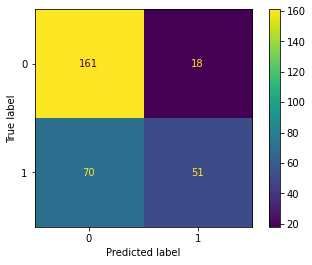

In [ ]:
plot_confusion_matrix(lm,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test,lm_pred))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       179
           1       0.74      0.42      0.54       121

    accuracy                           0.71       300
   macro avg       0.72      0.66      0.66       300
weighted avg       0.71      0.71      0.69       300



# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
op=[('scaler',scaler),('knn',knn)]

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(op)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
k_values=list(range(1,50))

In [ ]:
param_grid={'knn__n_neighbors':k_values}

In [ ]:
gm = GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='accuracy')

In [ ]:
gm.fit(scaled_X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

In [ ]:
gm.best_estimator_.get_params()

{'knn': KNeighborsClassifier(n_neighbors=49),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 49,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=49))],
 'verbose': False}

In [ ]:
gm_pred=gm.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


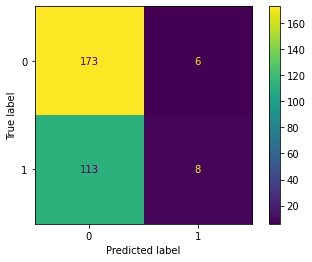

In [ ]:
plot_confusion_matrix(gm,scaled_X_test,y_test)

In [ ]:
accuracy_score(y_test,gm_pred)

0.6033333333333334

In [ ]:
print(classification_report(y_test,gm_pred))

              precision    recall  f1-score   support

           0       0.60      0.97      0.74       179
           1       0.57      0.07      0.12       121

    accuracy                           0.60       300
   macro avg       0.59      0.52      0.43       300
weighted avg       0.59      0.60      0.49       300



# SVM

In [ ]:
final_df.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,math score,reading score,writing score,test preparation course
0,0,1,0,0,0,1,0,0,0,0,1,72,72,74,0
1,0,0,1,0,0,0,0,0,1,0,1,69,90,88,1
2,0,1,0,0,0,0,0,1,0,0,1,90,95,93,0
3,1,0,0,0,0,0,0,0,0,0,0,47,57,44,0
4,1,0,1,0,0,0,0,0,1,0,1,76,78,75,0


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
C=np.linspace(0.001,100,100)

In [ ]:
param_grid={'C':C,
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma':['scale', 'auto']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gm = GridSearchCV(estimator=svc,param_grid=param_grid,scoring='accuracy',cv=5)

In [ ]:
gm.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+01, 1.71725455e+01, 1.81826364e+01, 1.919272...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
gm.best_params_

{'C': 3.0312727272727273, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
gm_pred=gm.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,accuracy_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


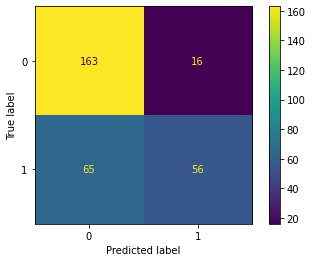

In [ ]:
plot_confusion_matrix(gm,scaled_X_test,y_test)

In [ ]:
accuracy_score(y_test,gm_pred)

0.73

In [ ]:
print(classification_report(y_test,gm_pred))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       179
           1       0.78      0.46      0.58       121

    accuracy                           0.73       300
   macro avg       0.75      0.69      0.69       300
weighted avg       0.74      0.73      0.71       300



# Naive Bayes

In [68]:
from sklearn.naive_bayes import BernoulliNB

In [69]:
gnb = BernoulliNB()

In [70]:
gnb.fit(scaled_X_train,y_train)

BernoulliNB()

In [71]:
y_pred=gnb.predict(scaled_X_test)

In [72]:
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


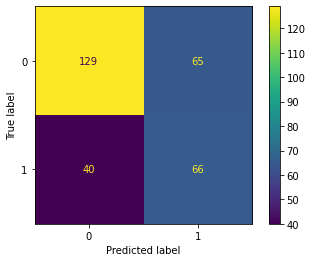

In [73]:
plot_confusion_matrix(gnb,scaled_X_test,y_test)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       194
           1       0.50      0.62      0.56       106

    accuracy                           0.65       300
   macro avg       0.63      0.64      0.63       300
weighted avg       0.67      0.65      0.66       300



In [75]:
accuracy_score(y_test,y_pred)

0.65

# Predicting Race/Ethnicity

# Data Prep

In [81]:
df=pd.read_csv('StudentsPerformance (1).csv')

In [82]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [83]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [84]:
df_objs=df[['gender','parental level of education', 'lunch','test preparation course']]
df_objs=pd.get_dummies(df_objs,drop_first=True)

In [85]:
new_df=pd.concat([df_objs,df[['math score', 'reading score','writing score']],df['race/ethnicity']],axis=1)

In [86]:
new_df.head()

,gender_male,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math score,reading score,writing score,race/ethnicity
0,0,1,0,0,0,0,1,1,72,72,74,group B
1,0,0,0,0,1,0,1,0,69,90,88,group C
2,0,0,0,1,0,0,1,1,90,95,93,group B
3,1,0,0,0,0,0,0,1,47,57,44,group A
4,1,0,0,0,1,0,1,1,76,78,75,group C


In [87]:
X=new_df.drop('race/ethnicity',axis=1)

In [88]:
y=new_df['race/ethnicity']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [92]:
scaler = StandardScaler()

In [93]:
scaled_X_train = scaler.fit_transform(X_train)

In [94]:
scaled_X_test = scaler.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lm=LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000)

In [ ]:
penalty=['l1','l2','elasticnet']
l1_ratio=np.linspace(0,1,20)
C=np.logspace(0,10,20)

param_grid={'penalty':penalty,
            'l1_ratio':l1_ratio,
            'C':C}

In [ ]:
gm=GridSearchCV(lm,param_grid=param_grid,scoring='accuracy')

In [ ]:
gm.fit(scaled_X_train,y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
gm.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [ ]:
gm_pred=gm.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,classification_report

In [ ]:
accuracy_score(y_test,gm_pred)

0.37666666666666665

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


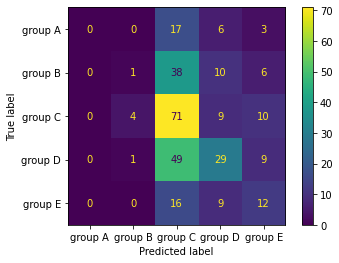

In [ ]:
plot_confusion_matrix(gm,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test,gm_pred))

              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        26
     group B       0.17      0.02      0.03        55
     group C       0.37      0.76      0.50        94
     group D       0.46      0.33      0.38        88
     group E       0.30      0.32      0.31        37

    accuracy                           0.38       300
   macro avg       0.26      0.29      0.25       300
weighted avg       0.32      0.38      0.31       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score,confusion_matrix

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
neighbors=np.arange(51)

In [ ]:
param_grid={'n_neighbors':neighbors}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gm = GridSearchCV(knn,param_grid,scoring='accuracy')

In [ ]:
gm.fit(scaled_X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 255.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 569, in _fit
    raise ValueError("Expected n_neighbors > 0. Got %d" % self.n_neighbors)
ValueError: Expecte

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='accuracy')

In [ ]:
gm.best_params_

{'n_neighbors': 48}

In [ ]:
gm_pred=gm.predict(scaled_X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


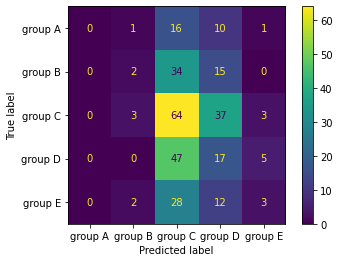

In [ ]:
plot_confusion_matrix(gm,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test,gm_pred))

              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        28
     group B       0.25      0.04      0.07        51
     group C       0.34      0.60      0.43       107
     group D       0.19      0.25      0.21        69
     group E       0.25      0.07      0.11        45

    accuracy                           0.29       300
   macro avg       0.21      0.19      0.16       300
weighted avg       0.24      0.29      0.23       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()

In [ ]:
C=np.linspace(0.001,100,100)

In [ ]:
param_grid={'C':C,
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma':['scale', 'auto']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gm=GridSearchCV(svc,param_grid,scoring='accuracy')

In [ ]:
gm.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+01, 1.71725455e+01, 1.81826364e+01, 1.91927273e+0...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
gm.best_params_

{'C': 6.061545454545455, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
gm_pred=gm.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score

In [ ]:
print(classification_report(y_test,gm_pred))

              precision    recall  f1-score   support

     group A       0.00      0.00      0.00        27
     group B       0.00      0.00      0.00        54
     group C       0.35      0.74      0.47        95
     group D       0.51      0.45      0.48        75
     group E       0.41      0.22      0.29        49

    accuracy                           0.38       300
   macro avg       0.25      0.28      0.25       300
weighted avg       0.30      0.38      0.32       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


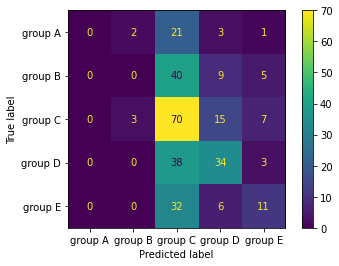

In [ ]:
plot_confusion_matrix(gm,scaled_X_test,y_test)

# Naive Bayes

In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
gnb=GaussianNB()

In [106]:
gnb.fit(scaled_X_train,y_train)

GaussianNB()

In [107]:
gnb_pred=gnb.predict(scaled_X_test)

In [108]:
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


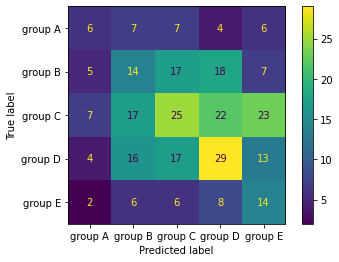

In [109]:
plot_confusion_matrix(gnb,scaled_X_test,y_test)

In [110]:
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

     group A       0.25      0.20      0.22        30
     group B       0.23      0.23      0.23        61
     group C       0.35      0.27      0.30        94
     group D       0.36      0.37      0.36        79
     group E       0.22      0.39      0.28        36

    accuracy                           0.29       300
   macro avg       0.28      0.29      0.28       300
weighted avg       0.30      0.29      0.29       300



In [111]:
accuracy_score(y_test,gnb_pred)

0.29333333333333333